# Import Library

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# A. Muat Data

In [2]:
try:
    data = pd.read_csv('data.csv', sep=',')
    print(f"Data Penjualan Windows berhasil dimuat. Jumlah baris: {len(data)}")
except FileNotFoundError:
    print("Pastikan file 'data.csv' ada di direktori yang sama.")
    exit()

# ingat ini untuk hapus kolom yang tidak digunakan
data = data.drop(columns=['Customer_ID', 'Nama', 'Tanggal_Registrasi'])

Data Penjualan Windows berhasil dimuat. Jumlah baris: 10500


# B. Split Independent Dependent Variable

In [3]:
TARGET_COLUMN = 'Beli_Windows'
X = data.drop(TARGET_COLUMN, axis=1)
y = data[TARGET_COLUMN]

# Bagi data: 80% Pelatihan, 20% Pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Data Training: {len(X_train)}, Data Testing: {len(X_test)}")

Data Training: 8400, Data Testing: 2100


# C. Definisikan Preprocessing (PEmbersihan Data)

In [4]:
numerical_features = ['Usia', 'Penghasilan_Bulanan_Juta', 'Kemampuan_Teknologi', 'Kebutuhan_Bisnis']
categorical_features = ['Pekerjaan']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features), 
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features) 
    ],
    remainder='passthrough'
)
print("Preprocessor telah didefinisikan.")

Preprocessor telah didefinisikan.


# D. Algoritma 1 Random Forest Classifier

--- Memulai Training Support Vector Classifier (SVC) ---

--- Support Vector Classifier Hasil ---
Akurasi: 0.8195
Classification Report (SVC):
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1302
           1       0.78      0.73      0.76       798

    accuracy                           0.82      2100
   macro avg       0.81      0.80      0.81      2100
weighted avg       0.82      0.82      0.82      2100



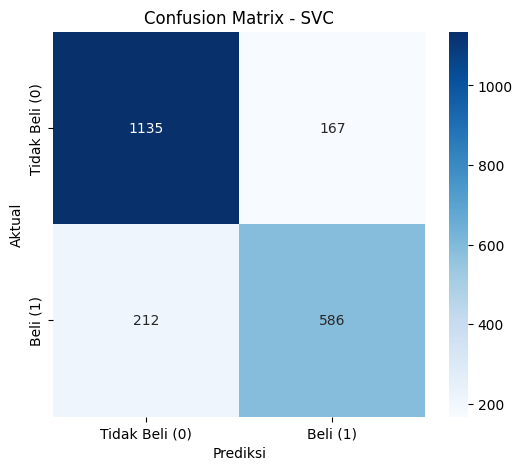

In [5]:
# Buat Jalur Perakitan (Pipeline) untuk Pembersihan Data + Model SVC
pipe_svc = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('classifier', SVC(random_state=42)) # bagian svc
])

print("--- Memulai Training Support Vector Classifier (SVC) ---")

# bagian latih model
pipe_svc.fit(X_train, y_train)

# bagian prediksi
y_pred_svc = pipe_svc.predict(X_test)

print("\n--- Support Vector Classifier Hasil ---")
print(f"Akurasi: {accuracy_score(y_test, y_pred_svc):.4f}")
print("Classification Report (SVC):")
print(classification_report(y_test, y_pred_svc))

# gambar matrik konfusion
cm_svc = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Tidak Beli (0)', 'Beli (1)'], 
            yticklabels=['Tidak Beli (0)', 'Beli (1)'])
plt.title('Confusion Matrix - SVC')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# E. Simpan Model

In [6]:
model_terbaik = pipe_svc

# Menyimpan file pkl
joblib.dump(model_terbaik, 'beli_windows.pkl')

print("\nModel SVC telah disimpan sebagai 'beli_windows.pkl'")


Model SVC telah disimpan sebagai 'beli_windows.pkl'
